# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]        
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hiratacho
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | east ballina
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 7 of Set 1 | ust'-kut
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | acacoyagua
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | zinjibar
Processing Record 12 of Set 1 | esens
Processing Record 13 of Set 1 | el daein
City not found. Skipping...
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | lucapa
Processing Record 17 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 18 of Set 1 | nuku'alofa
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | ranohira
City not fou

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hiratacho,35.4333,132.8167,297.16,73,75,6.17,JP,1686285967
1,puerto ayora,-0.7393,-90.3518,297.34,94,82,0.89,EC,1686285968
2,papatowai,-46.5619,169.4708,278.97,89,33,2.72,NZ,1686285968
3,east ballina,-28.8667,153.5833,295.26,55,0,3.22,AU,1686285968
4,avarua,-21.2078,-159.7750,298.18,78,100,5.66,CK,1686285968


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
city_data_df["Date"] = city_data_df["Date"]
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hiratacho,35.4333,132.8167,297.16,73,75,6.17,JP,1686285967
1,puerto ayora,-0.7393,-90.3518,297.34,94,82,0.89,EC,1686285968
2,papatowai,-46.5619,169.4708,278.97,89,33,2.72,NZ,1686285968
3,east ballina,-28.8667,153.5833,295.26,55,0,3.22,AU,1686285968
4,avarua,-21.2078,-159.7750,298.18,78,100,5.66,CK,1686285968


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

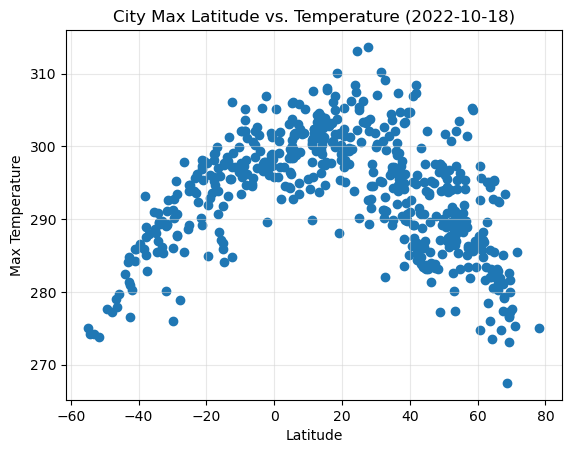

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(color='lightgrey', alpha=0.5)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

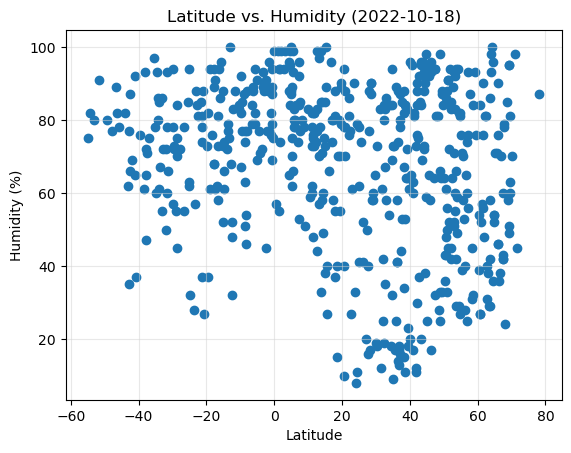

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])


# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='lightgrey', alpha=0.5)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

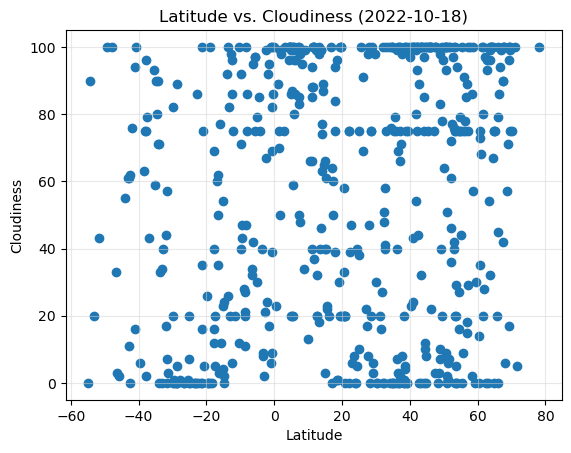

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

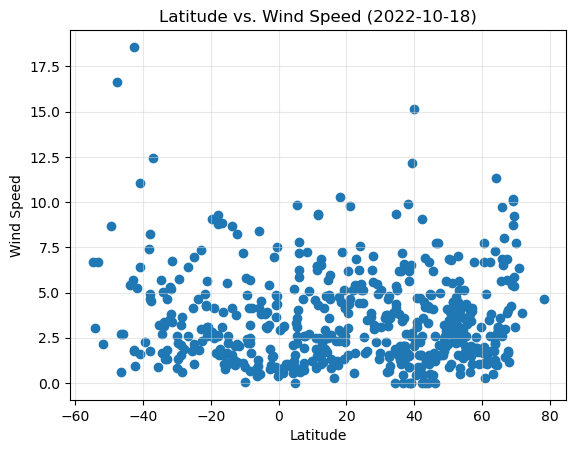

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def linear(x_values, y_values):
      (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
      regress_values = x_values * slope + intercept
      line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      plt.scatter(x_values,y_values)
      plt.plot(x_values,regress_values,"r-")
      plt.annotate(line_eq,(6,10),fontsize=15,color="red")
      print(f'The r-value is: {rvalue}')

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hiratacho,35.4333,132.8167,297.16,73,75,6.17,JP,1686285967
5,ust'-kut,56.7938,105.7672,301.46,25,15,2.04,RU,1686285968
7,acacoyagua,15.3500,-92.6500,297.79,89,61,0.82,MX,1686285968
9,zinjibar,13.1287,45.3807,304.58,70,18,2.39,YE,1686285968
10,esens,53.6487,7.6127,287.02,94,20,2.57,DE,1686285969


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,297.34,94,82,0.89,EC,1686285968
2,papatowai,-46.5619,169.4708,278.97,89,33,2.72,NZ,1686285968
3,east ballina,-28.8667,153.5833,295.26,55,0,3.22,AU,1686285968
4,avarua,-21.2078,-159.7750,298.18,78,100,5.66,CK,1686285968
6,namibe,-15.1961,12.1522,291.85,73,23,1.67,AO,1686285968


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6805800749630957


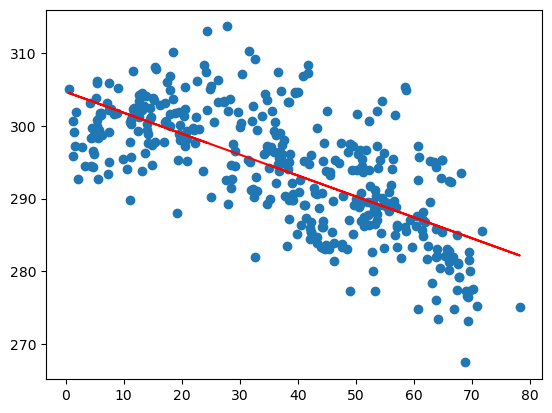

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear(x_values, y_values)


The r-value is: 0.8252713034612884


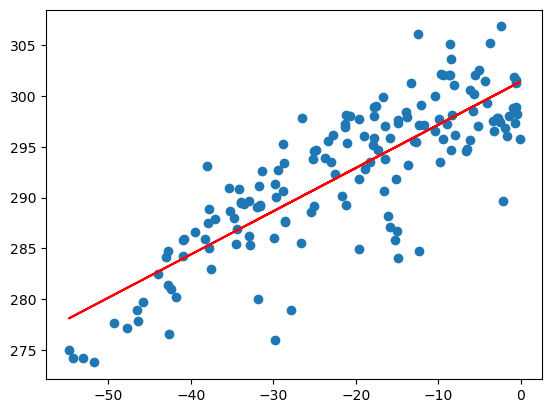

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear(x_values, y_values)

**Discussion about the linear relationship:** There is strong relationship between latitude and temperature in both Southern hemisphere (positively) and Northern hemisphere (negatively)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.16599092322585662


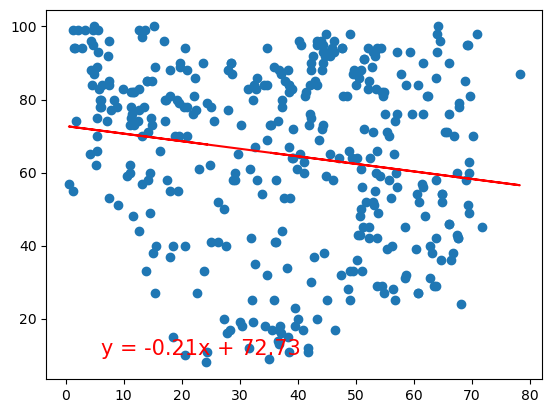

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear(x_values, y_values)

The r-value is: 0.13682300313987736


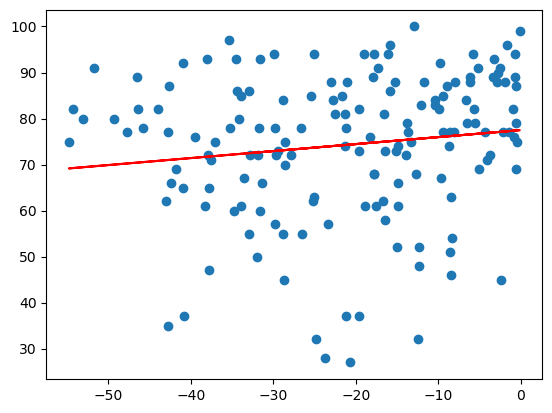

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear(x_values, y_values)

**Discussion about the linear relationship:** There is relatively weak relationship between latitude and humidity in both Southern hemisphere (positively) and Northern hemisphere (negatively)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.016889846338850094


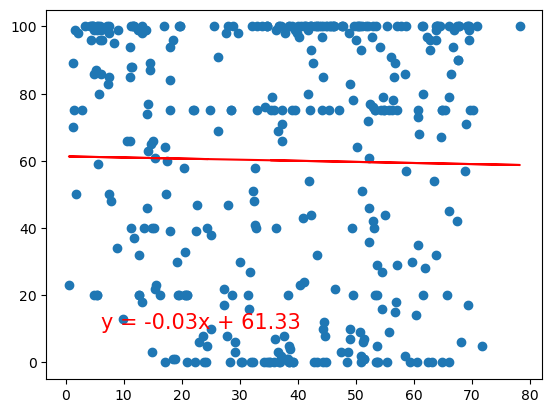

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear(x_values, y_values)

The r-value is: 0.11668592184534261


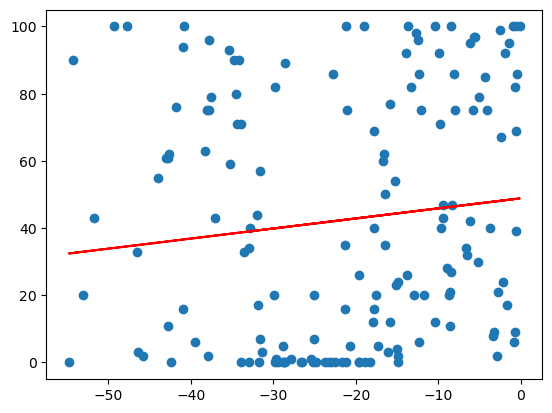

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear(x_values, y_values)

**Discussion about the linear relationship:** There is relatively weak relationship between latitude and cloudiness in both Southern hemisphere (positively) and weak relationship in Northern hemisphere (negatively)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0837978646433573


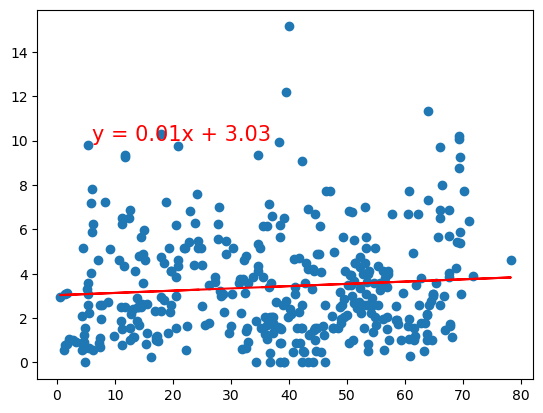

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear(x_values, y_values)

The r-value is: -0.2465359936582352


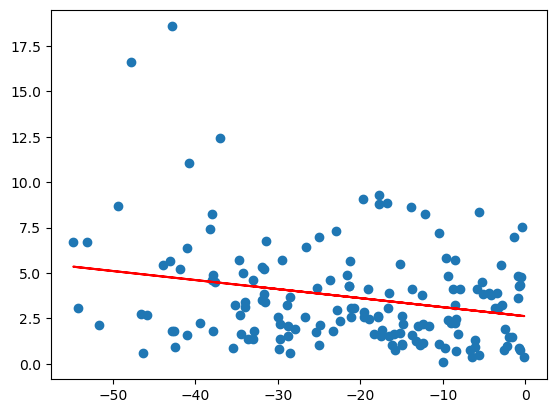

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear(x_values, y_values)

**Discussion about the linear relationship:** there is relatively weak relationship between latitude and cloudiness in Southern hemisphere (negatively) and weak relationship in Northern hemisphere (positively)